# Pandas Basics


In [1]:
import io
import pathlib
import requests
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ROOT_DIR = pathlib.Path("..")

EXAMPLES_URL = "https://github.com/KAUST-Academy/python-for-data-analysis/raw/moi-bridging-program-cohort-2/examples.zip"

response = requests.get(EXAMPLES_URL)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall(ROOT_DIR)

In [3]:
EXAMPLES_DIR = ROOT_DIR / "examples"

In [4]:
!ls $EXAMPLES_DIR 

array_ex.txt	ex4.csv			    ipython_bug.py  test_file.csv
csv_mindex.csv	ex5.csv			    macrodata.csv   tips.csv
ex1.csv		ex6.csv			    segismundo.txt  tseries.csv
ex1.xlsx	ex7.csv			    spx.csv	    volume.csv
ex2.csv		example.json		    stinkbug.png    yahoo_price.pkl
ex3.txt		fdic_failed_bank_list.html  stock_px.csv    yahoo_volume.pkl


## Pandas Data Structures

In [5]:
s0 = pd.Series([4, 7, -5, 3])
s0

0    4
1    7
2   -5
3    3
dtype: int64

In [6]:
s0.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
s1 = pd.Series([4, 5, -6, 3], index=["d", "c", "a", "b"])

In [8]:
s1

d    4
c    5
a   -6
b    3
dtype: int64

In [9]:
s1['a']

-6

In [10]:
s1 > 0

d     True
c     True
a    False
b     True
dtype: bool

In [11]:
s1[s1 > 0]

d    4
c    5
b    3
dtype: int64

In [12]:
np.exp(s1)

d     54.598150
c    148.413159
a      0.002479
b     20.085537
dtype: float64

In [15]:
data = {
    "Makkah": 35000,
    "Riyadh": 50000,
    "Eastern": 34000,
    "Tabuk": 61234.,
    "Jazan": 12312,
    "Al Jouf": 13455,
    "Asir": 636723,
    "Medina": 657845,
}

s2 = pd.Series(data)

In [16]:
s2

Makkah      35000.0
Riyadh      50000.0
Eastern     34000.0
Tabuk       61234.0
Jazan       12312.0
Al Jouf     13455.0
Asir       636723.0
Medina     657845.0
dtype: float64

In [17]:
s3 = pd.Series(
    data,
    index=[
        "Makkah",
        "Riyadh",
        "Eastern",
        "Tabuk",
        "Jazan",
        "Al Jouf",
        "Asir",
        "Medina",
        "Qassim",
    ]
)

In [18]:
s3

Makkah      35000.0
Riyadh      50000.0
Eastern     34000.0
Tabuk       61234.0
Jazan       12312.0
Al Jouf     13455.0
Asir       636723.0
Medina     657845.0
Qassim          NaN
dtype: float64

In [19]:
s3.to_dict()

{'Makkah': 35000.0,
 'Riyadh': 50000.0,
 'Eastern': 34000.0,
 'Tabuk': 61234.0,
 'Jazan': 12312.0,
 'Al Jouf': 13455.0,
 'Asir': 636723.0,
 'Medina': 657845.0,
 'Qassim': nan}

In [20]:
s3.isna()

Makkah     False
Riyadh     False
Eastern    False
Tabuk      False
Jazan      False
Al Jouf    False
Asir       False
Medina     False
Qassim      True
dtype: bool

In [21]:
s3.name = "Population"
s3.index.name = "Province"

In [22]:
s3

Province
Makkah      35000.0
Riyadh      50000.0
Eastern     34000.0
Tabuk       61234.0
Jazan       12312.0
Al Jouf     13455.0
Asir       636723.0
Medina     657845.0
Qassim          NaN
Name: Population, dtype: float64

### Exercise

Create a Series whose index is all the provinces in Saudi Arabia and whose values are the actual population values for the provinces.

In [23]:
data = {
    "Mecca Region": 8_557_766,
    "Riyadh Region": 8_216_284,
    "Eastern Region": 4_900_325,
    "'Asir Region": 2_211_875,
    "Jazan Region": 1_567_547,
    "Medina Region": 1_423_935,
    "Al-Qassim Region": 1_423_935,
    "Tabuk Region":	910_030,
    "Ha'il Region": 699_774,
    "Najran Region": 582_243,
    "Al-Jawf Region":	508_475,
    "Al-Bahah Region": 476_172,
    "Northern Borders": 365_231,
}

s4 = pd.Series(data, name="Population")

In [24]:
s4

Mecca Region        8557766
Riyadh Region       8216284
Eastern Region      4900325
'Asir Region        2211875
Jazan Region        1567547
Medina Region       1423935
Al-Qassim Region    1423935
Tabuk Region         910030
Ha'il Region         699774
Najran Region        582243
Al-Jawf Region       508475
Al-Bahah Region      476172
Northern Borders     365231
Name: Population, dtype: int64

In [25]:
s4.sum()

31843592

In [26]:
s4.mean()

2449507.076923077

In [27]:
s4.max()

8557766

In [28]:
s4.idxmax()

'Mecca Region'

In [29]:
data = {
    "province": ["Makkah", "Makkah", "Makkah", "Riyadh", "Riyadh"],
    "population": [8557766, 8557766, 8557766, 8216284, 8216284],
    "area (km^2)": [153128, 153128, 153128, 404240, 404240]
}

df0 = pd.DataFrame(data)

In [30]:
df0

,province,population,area (km^2)
0,Makkah,8557766,153128
1,Makkah,8557766,153128
2,Makkah,8557766,153128
3,Riyadh,8216284,404240
4,Riyadh,8216284,404240


In [32]:
df0.head(n=3)

,province,population,area (km^2)
0,Makkah,8557766,153128
1,Makkah,8557766,153128
2,Makkah,8557766,153128


In [33]:
df0.tail(n=2)

,province,population,area (km^2)
3,Riyadh,8216284,404240
4,Riyadh,8216284,404240


In [34]:
df0.columns

Index(['province', 'population', 'area (km^2)'], dtype='object')

In [35]:
df0.index

RangeIndex(start=0, stop=5, step=1)

In [38]:
df1 = pd.DataFrame(data, columns=["province", "population", "area (km^2)", "gdp"]) 

In [39]:
df1

,province,population,area (km^2),gdp
0,Makkah,8557766,153128,NaN
1,Makkah,8557766,153128,NaN
2,Makkah,8557766,153128,NaN
3,Riyadh,8216284,404240,NaN
4,Riyadh,8216284,404240,NaN


In [41]:
df1["population"]

0    8557766
1    8557766
2    8557766
3    8216284
4    8216284
Name: population, dtype: int64

In [42]:
df1.loc[2, "province"]

'Makkah'

In [43]:
df1.loc[1:3, :]

,province,population,area (km^2),gdp
1,Makkah,8557766,153128,NaN
2,Makkah,8557766,153128,NaN
3,Riyadh,8216284,404240,NaN


In [44]:
df1["gdp"] = 0.0

In [45]:
df1

,province,population,area (km^2),gdp
0,Makkah,8557766,153128,0.0
1,Makkah,8557766,153128,0.0
2,Makkah,8557766,153128,0.0
3,Riyadh,8216284,404240,0.0
4,Riyadh,8216284,404240,0.0


In [46]:
del df1["gdp"]

In [47]:
df1

,province,population,area (km^2)
0,Makkah,8557766,153128
1,Makkah,8557766,153128
2,Makkah,8557766,153128
3,Riyadh,8216284,404240
4,Riyadh,8216284,404240


In [ ]:
###

### Exercise

Make the table into a Pandas DataFrame.

In [52]:
columns = [
    "Historic Region",
    "Regions",
    "Capital",
    "Governorates",
    "Marakiz",
    "Population (2017 Census)",
    "Approximate area (km2)"
]

data = {
    0: ["Hejaz", "Mecca Region", "Makkah", 16, 111, 8_557_766, 153_128],
    1: ["Najd", "Riyadh Region", "Riyadh", 21, 453, 8_216_284, 404_240],
    2: ["Eastern Arabia", "Eastern Region", "Dammam", 11, 107, 4_900_325, 672_522],
    3: ["Southern Arabia", "'Asir Region", "Abha", 16, 101, 2_211_875, 76_693],
    4: ["Southern Arabia", "Jazan Region", "Jazan", 16, 31, 1_567_547, 11_671],
    5: ["Hejaz", "Medina Region", "Madinah", 8,	90, 1_423_935, 151_990],
    6: ["Najd", "Al-Qassim Region", "Buraidah", 12,	153, 1_423_935, 58_046],
    7: ["Hejaz", "Tabuk Region", "Tabuk", 6, 73, 910_030, 146_072],
    8: ["Najd", "Ha'il Region", "Ha'il", 8,	84, 699_774, 103_887],
    9: ["Southern Arabia", "Najran Region", "Najran", 7, 59, 582_243, 149_511],
    10: ["Badiah", "Al-Jawf Region", "Sakaka", 3, 33, 508_475, 100_212],
    11: ["Hejaz", "Al-Bahah Region", "Al-Baha", 9, 35, 476_172, 9_921],
    12: ["Badiah", "Northern Borders Region", "Arar", 3, 17, 365_231, 111_797],
}

df2 = pd.DataFrame.from_dict(data, orient="index", columns=columns)

In [53]:
df2

,Historic Region,Regions,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
0,Hejaz,Mecca Region,Makkah,16,111,8557766,153128
1,Najd,Riyadh Region,Riyadh,21,453,8216284,404240
2,Eastern Arabia,Eastern Region,Dammam,11,107,4900325,672522
3,Southern Arabia,'Asir Region,Abha,16,101,2211875,76693
4,Southern Arabia,Jazan Region,Jazan,16,31,1567547,11671
5,Hejaz,Medina Region,Madinah,8,90,1423935,151990
6,Najd,Al-Qassim Region,Buraidah,12,153,1423935,58046
7,Hejaz,Tabuk Region,Tabuk,6,73,910030,146072
8,Najd,Ha'il Region,Ha'il,8,84,699774,103887
9,Southern Arabia,Najran Region,Najran,7,59,582243,149511


## Essential Functionality

In [57]:
df2.head(n=5)

,Historic Region,Regions,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
0,Hejaz,Mecca Region,Makkah,16,111,8557766,153128
1,Najd,Riyadh Region,Riyadh,21,453,8216284,404240
2,Eastern Arabia,Eastern Region,Dammam,11,107,4900325,672522
3,Southern Arabia,'Asir Region,Abha,16,101,2211875,76693
4,Southern Arabia,Jazan Region,Jazan,16,31,1567547,11671


In [59]:
df3 = df2.set_index("Regions", drop=True)

In [60]:
df3.head()

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
Regions,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128
Riyadh Region,Najd,Riyadh,21,453,8216284,404240
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671


In [65]:
df3.loc["Mecca Region", :]

Historic Region               Hejaz
Capital                      Makkah
Governorates                     16
Marakiz                         111
Population (2017 Census)    8557766
Approximate area (km2)       153128
Name: Mecca Region, dtype: object

In [66]:
df3.drop("Mecca Region")

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
Regions,,,,,,
Riyadh Region,Najd,Riyadh,21,453,8216284,404240
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671
Medina Region,Hejaz,Madinah,8,90,1423935,151990
Al-Qassim Region,Najd,Buraidah,12,153,1423935,58046
Tabuk Region,Hejaz,Tabuk,6,73,910030,146072
Ha'il Region,Najd,Ha'il,8,84,699774,103887
Najran Region,Southern Arabia,Najran,7,59,582243,149511


In [67]:
df3.drop(["Mecca Region", "Al-Bahah Region"])

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
Regions,,,,,,
Riyadh Region,Najd,Riyadh,21,453,8216284,404240
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671
Medina Region,Hejaz,Madinah,8,90,1423935,151990
Al-Qassim Region,Najd,Buraidah,12,153,1423935,58046
Tabuk Region,Hejaz,Tabuk,6,73,910030,146072
Ha'il Region,Najd,Ha'il,8,84,699774,103887
Najran Region,Southern Arabia,Najran,7,59,582243,149511


In [69]:
df3.drop("Capital", axis="columns")

,Historic Region,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
Regions,,,,,
Mecca Region,Hejaz,16,111,8557766,153128
Riyadh Region,Najd,21,453,8216284,404240
Eastern Region,Eastern Arabia,11,107,4900325,672522
'Asir Region,Southern Arabia,16,101,2211875,76693
Jazan Region,Southern Arabia,16,31,1567547,11671
Medina Region,Hejaz,8,90,1423935,151990
Al-Qassim Region,Najd,12,153,1423935,58046
Tabuk Region,Hejaz,6,73,910030,146072
Ha'il Region,Najd,8,84,699774,103887


In [71]:
red_sea_provinces = [
    "Mecca Region",
    "Jazan Region",
    "'Asir Region",
    "Tabuk Region",
    "Medina Region"
]
df3.loc[red_sea_provinces, :]

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
Regions,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693
Tabuk Region,Hejaz,Tabuk,6,73,910030,146072
Medina Region,Hejaz,Madinah,8,90,1423935,151990


In [72]:
df3.loc[red_sea_provinces, ["Population (2017 Census)", "Approximate area (km2)"]]

,Population (2017 Census),Approximate area (km2)
Regions,,
Mecca Region,8557766,153128
Jazan Region,1567547,11671
'Asir Region,2211875,76693
Tabuk Region,910030,146072
Medina Region,1423935,151990


In [75]:
df3[df3["Population (2017 Census)"] > 1_000_000]

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
Regions,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128
Riyadh Region,Najd,Riyadh,21,453,8216284,404240
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671
Medina Region,Hejaz,Madinah,8,90,1423935,151990
Al-Qassim Region,Najd,Buraidah,12,153,1423935,58046


In [76]:
df3.loc[df3["Population (2017 Census)"] > 1_000_000, :]

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2)
Regions,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128
Riyadh Region,Najd,Riyadh,21,453,8216284,404240
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671
Medina Region,Hejaz,Madinah,8,90,1423935,151990
Al-Qassim Region,Najd,Buraidah,12,153,1423935,58046


In [79]:
df3.loc[:, "Population (2017 Census)"] / df3.loc[:, "Approximate area (km2)"]

Regions
Mecca Region                55.886357
Riyadh Region               20.325262
Eastern Region               7.286490
'Asir Region                28.840637
Jazan Region               134.311284
Medina Region                9.368610
Al-Qassim Region            24.531148
Tabuk Region                 6.230010
Ha'il Region                 6.735915
Najran Region                3.894315
Al-Jawf Region               5.073993
Al-Bahah Region             47.996371
Northern Borders Region      3.266912
dtype: float64

In [80]:
df3["Population Density (Person / km2)"] = (df3.loc[:, "Population (2017 Census)"]
                                               .div(df3.loc[:, "Approximate area (km2)"]))

In [81]:
df3

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128,55.886357
Riyadh Region,Najd,Riyadh,21,453,8216284,404240,20.325262
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522,7.286490
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693,28.840637
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671,134.311284
Medina Region,Hejaz,Madinah,8,90,1423935,151990,9.368610
Al-Qassim Region,Najd,Buraidah,12,153,1423935,58046,24.531148
Tabuk Region,Hejaz,Tabuk,6,73,910030,146072,6.230010
Ha'il Region,Najd,Ha'il,8,84,699774,103887,6.735915


In [86]:
(df3.loc[:, "Population Density (Person / km2)"]
    .sort_values(ascending=False))

Regions
Jazan Region               134.311284
Mecca Region                55.886357
Al-Bahah Region             47.996371
'Asir Region                28.840637
Al-Qassim Region            24.531148
Riyadh Region               20.325262
Medina Region                9.368610
Eastern Region               7.286490
Ha'il Region                 6.735915
Tabuk Region                 6.230010
Al-Jawf Region               5.073993
Najran Region                3.894315
Northern Borders Region      3.266912
Name: Population Density (Person / km2), dtype: float64

In [90]:
np.log(df3.iloc[:, -3:])

,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,
Mecca Region,15.962350,11.939029,4.023320
Riyadh Region,15.921629,12.909764,3.011865
Eastern Region,15.404812,13.418790,1.986022
'Asir Region,14.609351,11.247566,3.361785
Jazan Region,14.265023,9.364862,4.900160
Medina Region,14.168935,11.931570,2.237365
Al-Qassim Region,14.168935,10.968991,3.199944
Tabuk Region,13.721233,11.891855,1.829378
Ha'il Region,13.458513,11.551059,1.907454


In [91]:
df4 = df3.iloc[:, -3:]

In [92]:
df4.head()

,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,
Mecca Region,8557766,153128,55.886357
Riyadh Region,8216284,404240,20.325262
Eastern Region,4900325,672522,7.286490
'Asir Region,2211875,76693,28.840637
Jazan Region,1567547,11671,134.311284


In [93]:
df4.mean(axis=0)

Population (2017 Census)             2.449507e+06
Approximate area (km2)               1.653608e+05
Population Density (Person / km2)    2.721133e+01
dtype: float64

In [98]:
df3.sort_values(["Historic Region", "Governorates"], ascending=False)

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,,,,,
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693,28.840637
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671,134.311284
Najran Region,Southern Arabia,Najran,7,59,582243,149511,3.894315
Riyadh Region,Najd,Riyadh,21,453,8216284,404240,20.325262
Al-Qassim Region,Najd,Buraidah,12,153,1423935,58046,24.531148
Ha'il Region,Najd,Ha'il,8,84,699774,103887,6.735915
Mecca Region,Hejaz,Makkah,16,111,8557766,153128,55.886357
Al-Bahah Region,Hejaz,Al-Baha,9,35,476172,9921,47.996371
Medina Region,Hejaz,Madinah,8,90,1423935,151990,9.368610


### Exercises

1. Which regions have the highest population per governate? Which regions have the highest population per marakiz?
2. Select all regions whose population density is lower than the average population density.
3. Which regions have the highest marakiz density per km2? Which regions have the lowest?

In [99]:
df3.head()

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128,55.886357
Riyadh Region,Najd,Riyadh,21,453,8216284,404240,20.325262
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522,7.286490
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693,28.840637
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671,134.311284


In [102]:
# Mecca has the highest pop/governate
(df3.loc[:, "Population (2017 Census)"]
    .div(df3.loc[:, "Governorates"])
    .sort_values(ascending=False)
    .idxmax())

'Mecca Region'

In [103]:
(df3.loc[:, "Population (2017 Census)"]
    .div(df3.loc[:, "Marakiz"])
    .sort_values(ascending=False)
    .idxmax())

'Mecca Region'

In [109]:
average_density = (df3.loc[:, "Population Density (Person / km2)"]
                      .mean())
higher_than_avg = df3.loc[:, "Population Density (Person / km2)"] > average_density
df3.loc[higher_than_avg, :]

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128,55.886357
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693,28.840637
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671,134.311284
Al-Bahah Region,Hejaz,Al-Baha,9,35,476172,9921,47.996371


In [110]:
median_density = (df3.loc[:, "Population Density (Person / km2)"]
                     .median())
higher_than_median = df3.loc[:, "Population Density (Person / km2)"] > median_density
df3.loc[higher_than_median, :]

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128,55.886357
Riyadh Region,Najd,Riyadh,21,453,8216284,404240,20.325262
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693,28.840637
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671,134.311284
Al-Qassim Region,Najd,Buraidah,12,153,1423935,58046,24.531148
Al-Bahah Region,Hejaz,Al-Baha,9,35,476172,9921,47.996371


In [117]:
# Al-Bahah is the highest and northern borders is the lowest
(df3.loc[:, "Approximate area (km2)"]
    .div(df3.loc[:, "Marakiz"])
    .sort_values(ascending=True))

Regions
Al-Bahah Region             283.457143
Jazan Region                376.483871
Al-Qassim Region            379.385621
'Asir Region                759.336634
Riyadh Region               892.362031
Ha'il Region               1236.750000
Mecca Region               1379.531532
Medina Region              1688.777778
Tabuk Region               2000.986301
Najran Region              2534.084746
Al-Jawf Region             3036.727273
Eastern Region             6285.252336
Northern Borders Region    6576.294118
dtype: float64

In [114]:
df3.loc["Al-Bahah Region", :]

Historic Region                          Hejaz
Capital                                Al-Baha
Governorates                                 9
Marakiz                                     35
Population (2017 Census)                476172
Approximate area (km2)                    9921
Population Density (Person / km2)    47.996371
Name: Al-Bahah Region, dtype: object

In [118]:
df3.head()

,Historic Region,Capital,Governorates,Marakiz,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
Regions,,,,,,,
Mecca Region,Hejaz,Makkah,16,111,8557766,153128,55.886357
Riyadh Region,Najd,Riyadh,21,453,8216284,404240,20.325262
Eastern Region,Eastern Arabia,Dammam,11,107,4900325,672522,7.286490
'Asir Region,Southern Arabia,Abha,16,101,2211875,76693,28.840637
Jazan Region,Southern Arabia,Jazan,16,31,1567547,11671,134.311284


In [119]:
df3.describe()

,Governorates,Marakiz,Population (2017 Census),Approximate area (km2),Population Density (Person / km2)
count,13.000000,13.000000,1.300000e+01,13.000000,13.000000
mean,10.461538,103.615385,2.449507e+06,165360.769231,27.211331
std,5.501748,112.007841,2.893024e+06,181034.171414,36.473542
min,3.000000,17.000000,3.652310e+05,9921.000000,3.266912
25%,7.000000,35.000000,5.822430e+05,76693.000000,6.230010
50%,9.000000,84.000000,1.423935e+06,111797.000000,9.368610
75%,16.000000,107.000000,2.211875e+06,151990.000000,28.840637
max,21.000000,453.000000,8.557766e+06,672522.000000,134.311284


In [121]:
(df3.loc[:, "Historic Region"]
    .value_counts())

Hejaz              4
Najd               3
Southern Arabia    3
Badiah             2
Eastern Arabia     1
Name: Historic Region, dtype: int64

In [122]:
price = pd.read_pickle(EXAMPLES_DIR / "yahoo_price.pkl")
volume = pd.read_pickle(EXAMPLES_DIR / "yahoo_volume.pkl")

In [123]:
price.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571


In [124]:
price.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,117.550003,779.960022,154.770004,57.220001
2016-10-18,117.470001,795.260010,150.720001,57.660000
2016-10-19,117.120003,801.500000,151.259995,57.529999
2016-10-20,117.059998,796.969971,151.520004,57.250000
2016-10-21,116.599998,799.369995,149.630005,59.660000


In [125]:
price.describe()

,AAPL,GOOG,IBM,MSFT
count,1714.000000,1714.000000,1714.000000,1714.000000
mean,74.665633,451.536210,154.683470,33.797345
std,28.544699,167.737989,22.746468,11.234714
min,25.118093,217.817563,104.698697,19.420951
25%,50.028231,297.680337,142.436392,24.067961
50%,72.885582,432.715522,158.305000,29.356566
75%,98.217933,571.076931,173.465425,43.152811
max,129.180748,801.500000,195.359927,59.660000


<Axes: xlabel='Date'>

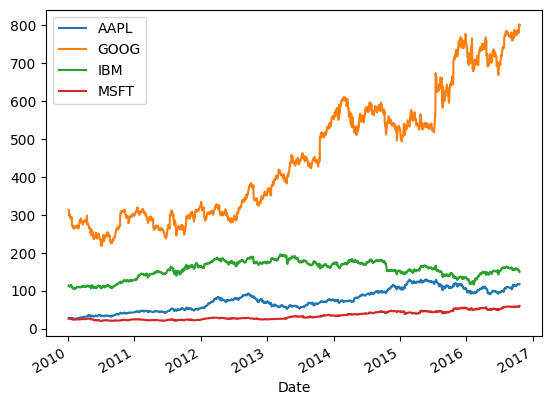

In [126]:
price.plot()

<Axes: xlabel='Date'>

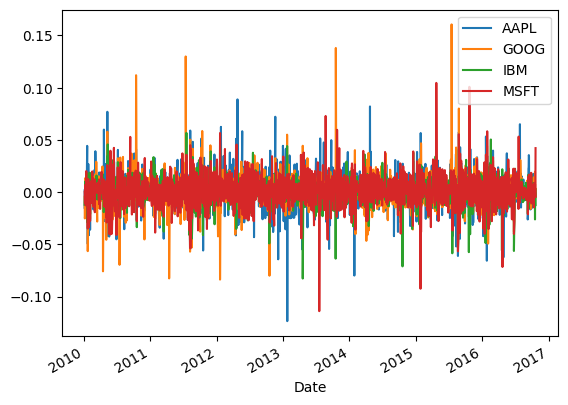

In [128]:
(price.pct_change()
      .plot())

In [129]:
(price.pct_change()
      .corr())

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000
